## Introduction

In this lecture, we will briefly discuss the calculation of the error of some "experimental" measurements and look at comparing different theoretical predictions to experimental data. We will also briefly revise some Monte Carlo methods.

## The simple pendulum

Figure 1 shows a schematic diagram of a pendulum of length $l$ with a bob of mass $m$. 
The bob is at an angle $\theta$, and an arc-length $s$, from its equilibrium position. The combination of the gravitiational force, $mg$, 
and the tension in the supporting (massless) rod, $T_s$, ensure that the pendulum moves along the arc indicated in the figure. The restoring force, $F$, is the force that acts towards the pendulum's equilibrium position.

![Simple pendulum](SimplePendulum.png)

**Figure 1:** *Simple pendulum illustrating the forces acting on the bob and the definitions of the arc $s$ and angle $\theta$.*

The force $F$ is given by:

$$
F = - mg \sin \theta.
$$

Note that $F$ acts in the negative $s$ direction in Figure 1.

Newton's second law states that $F = ma$, where $a = \frac{d^2s}{dt^2} = \ddot s$.
Since $s = l \theta$, we have:

$$
m \ddot s = m l \frac{{{d^2}\theta }}{{d{t^2}}} = m l\ddot \theta.
$$

Equating this to the restoring force gives $-mg \sin \theta = ml \ddot \theta$.
Hence:

$$
\ddot \theta  =  - \frac{g}{l}\theta.
$$

The acceleration of the bob is proportional to its displacement from equilibrium and directed towards its equilibrium position. This is an example of simple harmonic motion (SHM), a phenomenon that is encountered in many areas of physics. The motion of the bob can be described by the equation $\theta = \theta_0 \sin(\omega t + \phi)$. Here, $\omega$ is the angular frequency of the bob's motion, $\theta_0$ the amplitude and the value of $\phi$ (the phase constant) is determined by the *initial conditions* (the position and speed of the pendulum at $t = 0$). 

The angular frequency is given by:

$$
\omega = \sqrt {\frac{g}{l}},
$$

and this in turn is related to the period of the pendulum's oscillations by:

\begin{align}
T &= \frac{2 \pi}{\omega} \\ 
  &= 2 \pi \sqrt {\frac{l}{g}}.
\end{align}

## The pendulum at large amplitude

If large ampitude oscillations are considered, the pendulum is much more difficult to describe mathematically than is the case for small amplitude oscillations. In fact, there is no algebraic expression for $T$ that is valid at large angles, and measurements can deviate noticeably from the predictions of the above simple harmonic motion (SHM) formula. [This paper](https://arxiv.org/pdf/physics/0510206.pdf), by Lima and Arun, gives more accurate (but still approximate) results for the period at large amplitude. Their formula (referred to as the LA formula in the following) is:

$$
T =  - 2\pi \sqrt {\frac{l}{g}} \frac{{\log \left[ {\cos \frac{{{\theta _0}}}{2}} \right]}}{{1 - \cos \frac{{{\theta _0}}}{2}}}.
$$

Here, $\theta_0$, the maximum displacement of the pendulum, is assumed to occur at time $t = 0$.

The SHM and LA expectations for the period of a pendulum of length 0.5 m are plotted below as a function of amplitude.

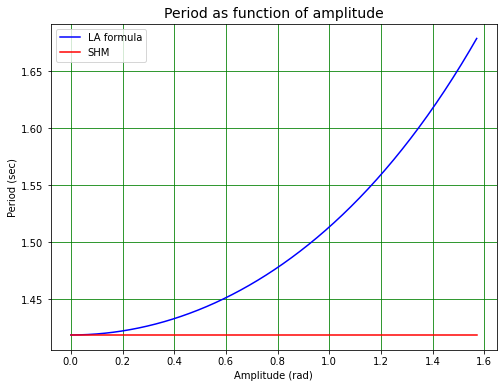

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
def periodLima(L, thetaZero):
    #
    T = -2*np.pi*np.sqrt(L/g)*np.log(np.cos(thetaZero/2))/(1 - np.cos(thetaZero/2))
    #
    return T
#
g = 9.81 # m/s**2
L = 0.5 # m
periodSHM = 2*np.pi*np.sqrt(L/g)
thetaBot = 0.0001
thetaTop = np.pi/2
#thetaTop = np.pi
nTheta = 240
thetaArr = np.linspace(thetaBot, thetaTop, nTheta)
periodArr = periodLima(L, thetaArr)
#
plt.figure(figsize = (8, 6))
plt.title('Period as function of amplitude', fontsize = 14)
plt.xlabel('Amplitude (rad)')
plt.ylabel('Period (sec)')
plt.plot(thetaArr, periodArr, label = "LA formula", color = 'b')
plt.plot(thetaArr, periodSHM*np.ones(nTheta), label = "SHM", color = 'r')
plt.grid(color = 'g')
plt.legend()
plt.show()

## Large angle pendulum experimental study

We will look at data taken using a pendulum of length $l = 0.5$ m (see below for how the "measurements" were really made!). The data are a set of measurements of the period for a range of angular amplitudes. We will investigate whether a significant deviation from the "simple" form for $T$ can be identified. The data are available as three files (which you can look at using MS excel):

* _thetaTable.csv_ contains the values of the amplitude of the pendulum's oscillations in radians. This is just a single column of data.

* _periodTableSmall.csv_ contains a table formed of $10$ measurements of the period for each of the amplitudes in _thetaTable.csv_. The rows in _periodTableSmall.csv_ correspond to the rows in _thetaTable.csv_. E.g. the third row (counting from zero!) contains the measured periods for the amplitude $0.394$ radians.

* _periodTableLarge.csv_ is the same as _periodTableSmall.csv_, except that there are $1000$ measurements for each amplitude of the pendulum.

In [11]:
!"C:\Program Files\Microsoft Office\root\Office16\EXCEL.EXE" thetaTable.csv

In [ ]:
!"C:\Program Files\Microsoft Office\root\Office16\EXCEL.EXE" periodTableSmall.csv

In [ ]:
!"C:\Program Files\Microsoft Office\root\Office16\EXCEL.EXE" periodTableLarge.csv

### Low precision experiment
We will read in _thetaTable.csv_ and _periodTableSmall.csv_ in the following cell, then check that they have the expected numbers of rows and columns (using the `array.shape` syntax, which gives us access to the length of 1D arrays, the number of rows and columns for 2D arrays, etc.).

In [12]:
thetaArr = np.loadtxt("thetaTable.csv", delimiter = ',')
periodArrSm = np.loadtxt("periodTableSmall.csv", delimiter = ',')
np.set_printoptions(precision = 3)
print(" ")
print("Shape of thetaArr =",thetaArr.shape)
print("Shape of periodArrSm =",periodArrSm.shape)
#
nTheta = thetaArr.shape[0]
nMeas = periodArrSm.shape[1]
print("nTheta =",nTheta,"and nMeas =",nMeas)
print(" ")
print("thetaArr =\n",thetaArr)
print(" ")
print("periodArr =\n",periodArrSm)

 
Shape of thetaArr = (16,)
Shape of periodArrSm = (16, 10)
nTheta = 16 and nMeas = 10
 
thetaArr =
 [0.1   0.198 0.296 0.394 0.492 0.59  0.688 0.786 0.884 0.982 1.081 1.179
 1.277 1.375 1.473 1.571]
 
periodArr =
 [[0.591 1.789 1.382 1.464 0.703 1.228 1.505 1.482 1.944 1.416]
 [2.099 0.75  2.135 0.863 1.935 2.659 0.743 1.278 1.377 1.27 ]
 [1.895 0.796 0.682 1.112 2.059 1.19  1.244 1.811 1.625 1.547]
 [0.974 1.159 1.413 1.623 1.171 1.006 1.996 0.705 2.115 1.739]
 [1.355 2.282 1.99  1.163 1.876 1.06  1.445 1.83  1.228 1.055]
 [1.272 1.759 1.541 1.655 1.322 1.422 1.285 1.597 1.594 2.151]
 [1.47  1.306 2.062 1.889 1.078 1.764 1.773 0.83  1.226 0.583]
 [2.197 1.705 0.886 1.138 1.592 0.42  1.19  0.595 2.127 1.243]
 [2.161 1.667 2.033 2.044 1.974 1.115 2.041 0.291 0.736 1.802]
 [1.412 1.146 1.2   1.249 0.391 2.078 1.098 1.193 1.279 1.459]
 [0.953 1.445 1.088 2.064 1.031 2.737 1.232 2.29  1.313 1.082]
 [1.144 1.513 0.802 1.711 0.77  1.297 1.363 0.853 1.238 1.552]
 [1.693 1.682 2.373 1.325 1.1

We now calculate the mean value of the period for each angle:

$$ \overline {T} = \frac{1}{N}\sum_{n = 1}^N T_n.$$

The *standard error* of the mean is given by:

$$ \delta \overline {T} = \frac{1}{\sqrt {N}} \sqrt{ \sum_{n = 1}^N \frac{(T_n - \overline {T})^2}{N - 1}}.$$

In this formula, the factor

$$s = \sqrt{ \sum_{n = 1}^N \frac{(T_n - \overline {T})^2}{N - 1}}$$

describes the spread of $T$ values we obtain from our experiment. It is the sample standard deviation of the $T$ distribution. (While the precision with which we know the average of this distribution increases as we make more measurements by the factor $1/\sqrt N$, 
the value of $s$ is a property of the apparatus and experimental procedure we are using; it doesn't change - within errors - with the number of measurements we make. We can only decrease $s$ by using better apparatus or improving our experimental procedure.)

In [13]:
#
# Calculate means for each amplitude
meanPeriods = np.mean(periodArrSm, axis = 1)
#
# Calculate sample standard deviation using numpy function, hence get standard error of mean.
errPeriods = np.std(periodArrSm, axis = 1, ddof = 1)/np.sqrt(nMeas)
print(" ")
print("Number\t Amplitude (rad)\t Mean period (s)")
for n in range(0, nTheta):
    print(f"{n:d}\t {thetaArr[n]:.2f}\t\t\t {meanPeriods[n]:.2f} +- {errPeriods[n]:.2f}")

 
Number	 Amplitude (rad)	 Mean period (s)
0	 0.10			 1.35 +- 0.13
1	 0.20			 1.51 +- 0.21
2	 0.30			 1.40 +- 0.15
3	 0.39			 1.39 +- 0.15
4	 0.49			 1.53 +- 0.14
5	 0.59			 1.56 +- 0.08
6	 0.69			 1.40 +- 0.15
7	 0.79			 1.31 +- 0.19
8	 0.88			 1.59 +- 0.20
9	 0.98			 1.25 +- 0.13
10	 1.08			 1.52 +- 0.20
11	 1.18			 1.22 +- 0.10
12	 1.28			 1.67 +- 0.19
13	 1.37			 1.77 +- 0.14
14	 1.47			 1.64 +- 0.13
15	 1.57			 1.68 +- 0.18


We now plot our measurements and compare them with the theoretical SHM and Lima curves. 

 
Chi2 for simple approximation = 23.01, chi2/NDF = 1.53
 
Chi2 for Lima/Arun approximation = 19.15, chi2/NDF = 1.28
 


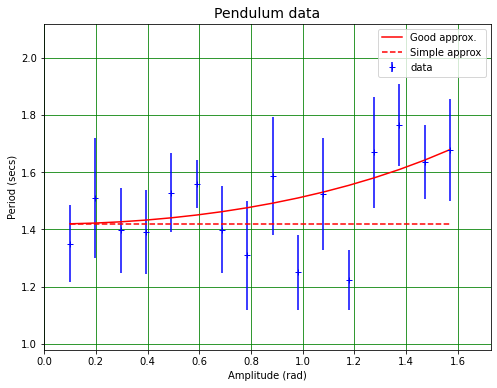

In [14]:
#
# Expected period and chi2 for SHM
ySHM = 2*np.pi*np.sqrt(L/g)*np.ones(nTheta)
chi2SHM = (ySHM - meanPeriods)**2/errPeriods**2
chi2sumSHM = np.sum(chi2SHM)
print(" ")
print(f"Chi2 for simple approximation = {chi2sumSHM:.2f}, chi2/NDF = {chi2sumSHM/(nTheta - 1):.2f}")
#
# Expected period and chii2 for Lima formula
chi2 = (periodLima(L, thetaArr) - meanPeriods)**2/errPeriods**2 
chi2sum = np.sum(chi2)
print(" ")
print(f"Chi2 for Lima/Arun approximation = {chi2sum:.2f}, chi2/NDF = {chi2sum/(nTheta - 1):.2f}")
#
print(" ")
plt.figure(figsize = (8, 6))
plt.title('Pendulum data', fontsize = 14)
plt.xlabel('Amplitude (rad)')
plt.ylabel('Period (secs)')
plt.errorbar(thetaArr, meanPeriods, yerr = errPeriods, 
             linestyle = '', marker = '+', color = 'b', label = "data")
plt.plot(thetaArr, periodLima(L, thetaArr), color = 'r', label = "Good approx.")
plt.plot(thetaArr, ySHM, color = 'r', linestyle = '--', label = "Simple approx")
plt.xlim(0.0, 1.1*thetaArr[nTheta - 1])
plt.ylim(0.8*np.min(meanPeriods), 1.2*np.max(meanPeriods))
plt.legend()
plt.grid(color = 'g')

Does the difference between the two $\chi^2$ values calculated above allow us to state that the pendulum is not following SHM? In this case, no, as acceptable $\chi^2$/NDF values lie in the range 0.2 to 5.0 (some people use 0.25 to 4) so both of the above values are OK: we cannot say the pendulum is not obeying the SHM prediction.

### Increase precision

Repeat the above calculation using the large dataset in the file _periodTableLarge.csv_. Can we now conclude that there is a deviation from SHM at large amplitudes? 

 
Shape of periodArrLg = (16, 1000)
nTheta = 16 and nMeas = 1000
 
Number	 Amplitude (rad)	 Mean period (s)
0	 0.10			 1.40 +- 0.02
1	 0.20			 1.45 +- 0.02
2	 0.30			 1.45 +- 0.02
3	 0.39			 1.44 +- 0.02
4	 0.49			 1.46 +- 0.02
5	 0.59			 1.44 +- 0.02
6	 0.69			 1.45 +- 0.02
7	 0.79			 1.48 +- 0.02
8	 0.88			 1.49 +- 0.02
9	 0.98			 1.53 +- 0.02
10	 1.08			 1.54 +- 0.02
11	 1.18			 1.53 +- 0.02
12	 1.28			 1.56 +- 0.02
13	 1.37			 1.61 +- 0.02
14	 1.47			 1.66 +- 0.02
15	 1.57			 1.69 +- 0.02
 
Chi2 for simple approximation = 956.91, chi2/NDF = 63.79
 
Chi2 for Lima/Arun approximation = 16.83, chi2/NDF = 1.12
 


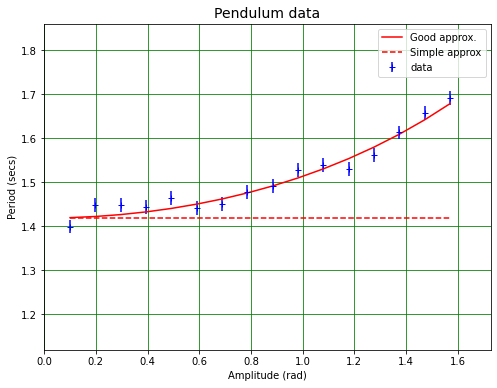

In [17]:
periodArrLg = np.loadtxt("periodTableLarge.csv", delimiter = ',')
print(" ")
print("Shape of periodArrLg =",periodArrLg.shape)
#
nMeas = periodArrLg.shape[1]
print("nTheta =",nTheta,"and nMeas =",nMeas)
#
meanPeriods = np.mean(periodArrLg, axis = 1)
errPeriods = np.std(periodArrLg, axis = 1, ddof = 1)/np.sqrt(nMeas)
print(" ")
print("Number\t Amplitude (rad)\t Mean period (s)")
for n in range(0, nTheta):
    print(f"{n:d}\t {thetaArr[n]:.2f}\t\t\t {meanPeriods[n]:.2f} +- {errPeriods[n]:.2f}")#
g = 9.81
ySHM = 2*np.pi*np.sqrt(L/g)*np.ones(nTheta)
chi2SHM = (ySHM - meanPeriods)**2/errPeriods**2
chi2sumSHM = np.sum(chi2SHM)
print(" ")
print(f"Chi2 for simple approximation = {chi2sumSHM:.2f}, chi2/NDF = {chi2sumSHM/(nTheta - 1):.2f}")
#
chi2full = (periodLima(L, thetaArr) - meanPeriods)**2/errPeriods**2 
chi2sumFull = np.sum(chi2full)
print(" ")
print(f"Chi2 for Lima/Arun approximation = {chi2sumFull:.2f}, chi2/NDF = {chi2sumFull/(nTheta - 1):.2f}")
#
print(" ")
plt.figure(figsize = (8, 6))
plt.title('Pendulum data', fontsize = 14)
plt.xlabel('Amplitude (rad)')
plt.ylabel('Period (secs)')
plt.errorbar(thetaArr, meanPeriods, yerr = errPeriods, 
             linestyle = '', marker = '+', color = 'b', label = "data")
plt.plot(thetaArr, periodLima(L, thetaArr), color = 'r', label = "Good approx.")
plt.plot(thetaArr, ySHM, color = 'r', linestyle = '--', label = "Simple approx")
plt.xlim(0.0, 1.1*thetaArr[nTheta - 1])
plt.ylim(0.8*np.min(meanPeriods), 1.1*np.max(meanPeriods))
plt.legend()
plt.grid(color = 'g')
plt.savefig("periodDataLargeNew.png")

The SHM formula results in a $\chi^2$/NDF which is outside the range 0.2 to 5.0, so this formula does not describe the data. The $\chi^2$/NDF value for the Lima/Arum formula is inside the acceptable range, so this does describe the data.

These results demonstrate the importance of precision in physics experiments!

## Monte Carlo revisited

The "experimental data" used above wasn't actually a set of measurements of the motion of a pendulum. (It is difficult to precisely measure the behaviour of a pendulum for large amplitudes!) It was generated using the code in the cell below.

In [16]:
Debug = False
#
# Range of amplitudes (angles) considered 
thetaBot = 0.1 # rad
thetaTop = np.pi/2 # rad
nTheta = 16
thetaArr = np.linspace(thetaBot, thetaTop, nTheta) # rad
#
# Pendulum length 
L = 0.5 # m
#
# Assumed measurement precision
periodSigma = 0.5 # seconds
#
nMeas = 10
periodTabSm = np.zeros((nTheta, nMeas))
#
periodLimaValues = np.zeros(nTheta)
#
for n in range(0, nTheta):
    periodLimaValues[n] = periodLima(L, thetaArr[n]) # seconds
    periodTabSm[n, 0:nMeas] = np.random.normal(periodLimaValues[n], scale = periodSigma, size = nMeas) # seconds
if Debug: print(periodTab)
#
np.savetxt("thetaTable.csv", thetaArr, delimiter = ',', )
np.savetxt("periodTableSmall.csv", periodTabSm, delimiter = ',')
#
nMeas = 1000
periodTabLg = np.zeros((nTheta, nMeas))
#
for n in range(0, nTheta):
    periodTabLg[n, 0:nMeas] = np.random.normal(periodLimaValues[n], periodSigma, nMeas) # seconds
if Debug: print(periodTab)
#
np.savetxt("periodTableLarge.csv", periodTabLg, delimiter = ',')

## Summary

I hope that revising calculating means and their standard errors, fitting techniques (last week) and the calculation and use of $\chi^2$ values is useful for your practicals!